In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/DataBridge')

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
import cv2
import numpy as np
# Define the Horse Herd Algorithm function or use a pre-existing implementation
def horse_herd_algorithm(img):
  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian blur to the image
  blur = cv2.GaussianBlur(gray, (3, 3), 0)

  # Apply Canny edge detection to the image
  edges = cv2.Canny(blur, 30, 100)

  # Apply the Horse Herd Algorithm to the image
  num_iter = 10
  for i in range(num_iter):
      # Calculate the mean and standard deviation of the edge intensities
      mean, std = cv2.meanStdDev(edges)

      # Threshold the image based on the mean and standard deviation
      threshold = int(mean - std)
      ret, thresh = cv2.threshold(edges, threshold, 255, cv2.THRESH_BINARY)

      # Apply a closing operation to the thresholded image
      kernel = np.ones((5,5),np.uint8)
      closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

      # Update the edges using the closing operation
      edges = cv2.Canny(closing, 30, 100)

  # Find contours in the final edge map
  contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # Draw the contours on the original image
  cv2.drawContours(img, contours, -1, (0,255,0), 2)

  return img


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
imagesp = []

folder_path = 'Positive'
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    print(img_path)
    img = mpimg.imread(img_path)
    imagesp.append(img)

print(len(imagesp))

Streaming output truncated to the last 5000 lines.
Positive/03942.jpg
Positive/03980.jpg
Positive/03951.jpg
Positive/03973.jpg
Positive/04016.jpg
Positive/04014.jpg
Positive/03991.jpg
Positive/04005.jpg
Positive/03940.jpg
Positive/04021.jpg
Positive/03981.jpg
Positive/03999.jpg
Positive/03976.jpg
Positive/04023.jpg
Positive/04013.jpg
Positive/03964.jpg
Positive/03962.jpg
Positive/04004.jpg
Positive/03943.jpg
Positive/03995.jpg
Positive/03969.jpg
Positive/03956.jpg
Positive/03972.jpg
Positive/03949.jpg
Positive/04104.jpg
Positive/04108.jpg
Positive/04091.jpg
Positive/04042.jpg
Positive/04076.jpg
Positive/04059.jpg
Positive/04048.jpg
Positive/04038.jpg
Positive/04075.jpg
Positive/04103.jpg
Positive/04073.jpg
Positive/04062.jpg
Positive/04041.jpg
Positive/04035.jpg
Positive/04071.jpg
Positive/04078.jpg
Positive/04100.jpg
Positive/04099.jpg
Positive/04084.jpg
Positive/04034.jpg
Positive/04037.jpg
Positive/04043.jpg
Positive/04060.jpg
Positive/04082.jpg
Positive/04088.jpg
Positive/04070.jpg

In [ ]:
new_imagesp = []
for img in imagesp:
    new_img = horse_herd_algorithm(img)
    cv2.resize(new_img, (64,64))
    new_imagesp.append(new_img)
new_folder_path = 'Postive_HH'
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

In [ ]:
for i, new_img in enumerate(new_imagesp):
    new_img_path = os.path.join(new_folder_path, f"new_image_{i}.jpg")
    print(new_img_path)
    cv2.imwrite(new_img_path,new_img)

In [ ]:
imagesn = []
folder_path = 'Negative'
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    print(img_path)
    img = mpimg.imread(img_path)
    imagesn.append(img)

print(len(imagesn))

Streaming output truncated to the last 5000 lines.
Negative/04062.jpg
Negative/04032.jpg
Negative/04053.jpg
Negative/04087.jpg
Negative/04112.jpg
Negative/04094.jpg
Negative/04028.jpg
Negative/04071.jpg
Negative/04050.jpg
Negative/04048.jpg
Negative/04080.jpg
Negative/04060.jpg
Negative/04091.jpg
Negative/04052.jpg
Negative/04104.jpg
Negative/04037.jpg
Negative/04088.jpg
Negative/04082.jpg
Negative/04111.jpg
Negative/04045.jpg
Negative/04040.jpg
Negative/04044.jpg
Negative/04038.jpg
Negative/04054.jpg
Negative/04097.jpg
Negative/04033.jpg
Negative/04108.jpg
Negative/04093.jpg
Negative/04072.jpg
Negative/04114.jpg
Negative/04109.jpg
Negative/04106.jpg
Negative/04039.jpg
Negative/04056.jpg
Negative/04055.jpg
Negative/04036.jpg
Negative/04077.jpg
Negative/04049.jpg
Negative/04092.jpg
Negative/04089.jpg
Negative/04031.jpg
Negative/04098.jpg
Negative/04030.jpg
Negative/04096.jpg
Negative/04086.jpg
Negative/04061.jpg
Negative/04107.jpg
Negative/04085.jpg
Negative/04084.jpg
Negative/04043.jpg

In [ ]:
new_imagesn = []
for img in imagesn:
    new_img = horse_herd_algorithm(img)
    cv2.resize(new_img, (64,64))
    new_imagesn.append(new_img)
new_folder_path = 'Negative_HH'
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

In [ ]:
for i, new_img in enumerate(new_imagesn):
    new_img_path = os.path.join(new_folder_path, f"new_image_{i}.jpg")
    print(new_img_path)
    cv2.imwrite(new_img_path,new_img)

In [ ]:
def generate_df(img_dir, label):

    file_paths = pd.Series(list(img_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    print(file_paths[:10])
    print()
    labels = pd.Series(label, name='Label', index=file_paths.index)
    df = pd.concat([file_paths, labels], axis=1)

    return df

In [ ]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf

positive_dir = Path(r'Postive_HH')
negative_dir = Path(r'Negative_HH')

In [ ]:
import pandas as pd
negative_df = generate_df(negative_dir, 'NEGATIVE')
positive_df = generate_df(positive_dir, 'POSITIVE')
# concatenate both positive and negative df
all_df = pd.concat([positive_df, negative_df], axis=0)
all_df

0    Negative_HH/new_image_19017.jpg
1    Negative_HH/new_image_19018.jpg
2    Negative_HH/new_image_19019.jpg
3    Negative_HH/new_image_19020.jpg
4    Negative_HH/new_image_19021.jpg
5    Negative_HH/new_image_19022.jpg
6    Negative_HH/new_image_19023.jpg
7    Negative_HH/new_image_19024.jpg
8    Negative_HH/new_image_19025.jpg
9    Negative_HH/new_image_19026.jpg
Name: Filepath, dtype: object

0    Postive_HH/new_image_19000.jpg
1    Postive_HH/new_image_19001.jpg
2    Postive_HH/new_image_19002.jpg
3    Postive_HH/new_image_19003.jpg
4    Postive_HH/new_image_19004.jpg
5    Postive_HH/new_image_19005.jpg
6    Postive_HH/new_image_19006.jpg
7    Postive_HH/new_image_19007.jpg
8    Postive_HH/new_image_19008.jpg
9    Postive_HH/new_image_19009.jpg
Name: Filepath, dtype: object



,Filepath,Label
0,Postive_HH/new_image_19000.jpg,POSITIVE
1,Postive_HH/new_image_19001.jpg,POSITIVE
2,Postive_HH/new_image_19002.jpg,POSITIVE
3,Postive_HH/new_image_19003.jpg,POSITIVE
4,Postive_HH/new_image_19004.jpg,POSITIVE
...,...,...
20012,Negative_HH/new_image_12.jpg,NEGATIVE
20013,Negative_HH/new_image_13.jpg,NEGATIVE
20014,Negative_HH/new_image_14.jpg,NEGATIVE
20015,Negative_HH/new_image_15.jpg,NEGATIVE


In [ ]:
set(all_df['Label'])

{'NEGATIVE', 'POSITIVE'}

In [ ]:
train_df, test_df = train_test_split(all_df, train_size=0.8,shuffle=True)
print(train_df.shape, test_df.shape)

(32013, 2) (8004, 2)


In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_gen.flow_from_dataframe(train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120),
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          subset='training')


val_data = train_gen.flow_from_dataframe(train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120),
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          subset='validation')


test_data = test_gen.flow_from_dataframe(test_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120),
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=False,
                                          seed=42)

Found 25611 validated image filenames belonging to 2 classes.
Found 6402 validated image filenames belonging to 2 classes.
Found 8004 validated image filenames belonging to 2 classes.


In [ ]:
inputs = tf.keras.Input(shape=(120,120,3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
# print model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496 

In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=3,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=5,
                                                              restore_best_weights=True)
                             ])

Epoch 1/3
801/801 [==============================] - 9555s 12s/step - loss: 0.1547 - accuracy: 0.9443 - val_loss: 0.0944 - val_accuracy: 0.9806
Epoch 2/3
801/801 [==============================] - 456s 569ms/step - loss: 0.0704 - accuracy: 0.9787 - val_loss: 0.0753 - val_accuracy: 0.9739
Epoch 3/3
801/801 [==============================] - 456s 570ms/step - loss: 0.0642 - accuracy: 0.9807 - val_loss: 0.0707 - val_accuracy: 0.9758


In [ ]:
model.save("mymodel.h5")

In [ ]:

import plotly.express as px
fig = px.line(history.history,
             y=['loss', 'val_loss'],
             labels={'index':'Epoch'},
             title='Training and Validation Loss over Time')

fig.show()

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, r2_score
import numpy as np
def evaluate_model(model, test_data):
    print("testing")
    results = model.evaluate(test_data, verbose=1)
    loss = results[0]
    accuracy = results[1]

    print(f'Test Loss {loss:.5f}')
    print(f'Test Accuracy {accuracy * 100:.2f} %')


    # predicted y values
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    y_certain = np.squeeze((model.predict(test_data)).astype(np.int))

    conf_matr = confusion_matrix(test_data.labels, y_pred)

    class_report = classification_report(test_data.labels, y_pred,
                                         target_names=['NEGATIVE', 'POSITIVE'])

    plt.figure(figsize=(6,6))

    sns.heatmap(conf_matr, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')

    plt.xticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print('r2 Score : ', r2_score(test_data.labels, y_pred))
    print()
    print('Classification Report :\n......................\n', class_report)

testing
251/251 [==============================] - 56s 222ms/step - loss: 0.0611 - accuracy: 0.9779
Test Loss 0.06109
Test Accuracy 97.79 %
251/251 [==============================] - 53s 211ms/step


<ipython-input-6-8f3992398ce0>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))


251/251 [==============================] - 53s 211ms/step


<ipython-input-6-8f3992398ce0>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_certain = np.squeeze((model.predict(test_data)).astype(np.int))


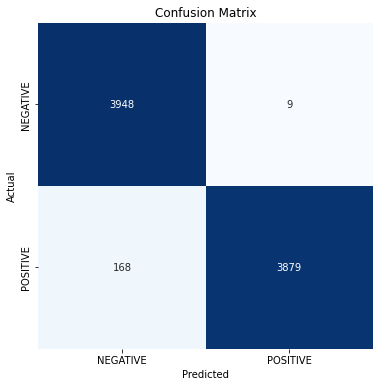

r2 Score :  0.9115330424749527

Classification Report :
......................
               precision    recall  f1-score   support

    NEGATIVE       0.96      1.00      0.98      3957
    POSITIVE       1.00      0.96      0.98      4047

    accuracy                           0.98      8004
   macro avg       0.98      0.98      0.98      8004
weighted avg       0.98      0.98      0.98      8004



In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("mymodel.h5")
evaluate_model(model, test_data)

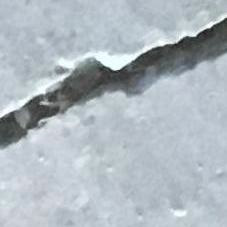

1/1 [==============================] - 0s 28ms/step
positive


In [ ]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from PIL import Image

im=Image.open("testimages/p.jpg")
a = mpimg.imread("testimages/p.jpg")
im.show()
a1 = cv2.resize(a,(120,120))
a2 = np.expand_dims(a1, axis=0)
a3 = model.predict(a2)
if a3[0][0]==1:
  print("positive")
else:
  print("negative")

#Image with Crack


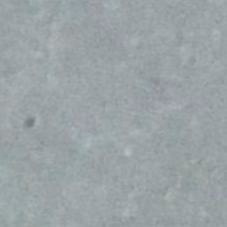

1/1 [==============================] - 0s 91ms/step
negative


In [ ]:
b = mpimg.imread("testimages/n.jpg")
im1=Image.open("testimages/n.jpg")
im1.show()
b1 = cv2.resize(b,(120,120))
b2 = np.expand_dims(b1, axis=0)
b3 = model.predict(b2)
if b3[0][0]==1:
  print("positive")
else:
  print("negative")

#Image without Crack